In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Atomcamp/Chocolate Sales - Chocolate Sales (1).csv')

In [ ]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,1094,1094,1094,1094,1094,1094.000000
unique,25,6,22,168,827,NaN
top,Kelci Walkden,Australia,Eclairs,30-Jun-22,"$2,317",NaN
freq,54,205,60,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,161.797989
std,NaN,NaN,NaN,NaN,NaN,121.544145
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,70.000000
50%,NaN,NaN,NaN,NaN,NaN,135.000000
75%,NaN,NaN,NaN,NaN,NaN,228.750000


In [ ]:
#Converting Date to datatime to make data preprocessing easy
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-7-1739578411>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
#I'v added a `Month` column because the dataset is for the year 2022, so analyzing sales by month will be needed.
df['Month'] = df['Date'].dt.month_name()

In [ ]:
#Removing dollar sign and comma from Amount column so that it can be converted to numerical column
df['Amount in Dollars'] = df['Amount'].str.replace('$','').str.replace(',', '').astype(int)
df.drop('Amount', axis=1, inplace=True)

# Exploratory Data Analysis

### 1. Data inconsistencies and duplicates

In [ ]:
for col in df:
  print(df[col].value_counts())
  print('___________________________________________')

Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Oby Sorrel             49
Dennison Crosswaite    49
Ches Bonnell           48
Gigi Bohling           47
Karlen McCaffrey       47
Curtice Advani         46
Madelene Upcott        45
Kaine Padly            45
Marney O'Breen         45
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Barr Faughny           43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Rafaelita Blaksland    34
Wilone O'Kielt         34
Camilla Castle         32
Name: count, dtype: int64
___________________________________________
Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64
___________________________________________
Product
Eclairs                 60
50% Dark Bites          60
Smooth Sliky 

In [ ]:
df.duplicated().sum()

np.int64(0)

The data has no inconsistency, no missing values and no duplicates. It's clean, so can we start our EDA and prepocessing for modelling

### 2. Data distribution

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Boxes Shipped'}>],
       [<Axes: title={'center': 'Amount in Dollars'}>, <Axes: >]],
      dtype=object)

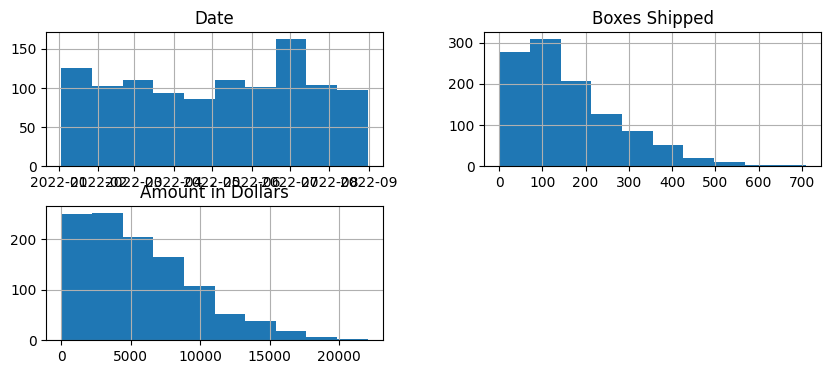

In [ ]:
df.hist(figsize=(10,4))

### 3. Checking outliers

<Axes: ylabel='Amount in Dollars'>

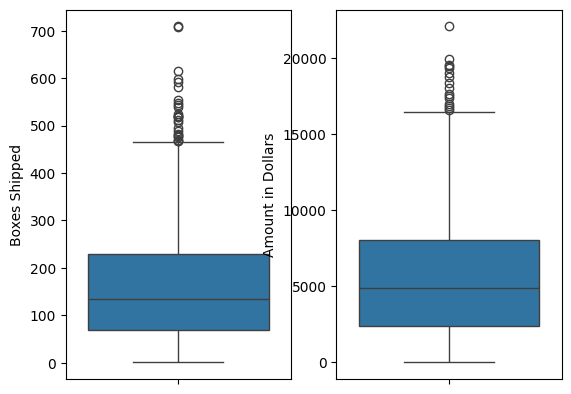

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(df, y='Boxes Shipped')

plt.subplot(1,2,2)
sns.boxplot(df, y='Amount in Dollars')


In [ ]:
#Analyzing extreme points
df[df['Amount in Dollars']>20000]

,Sales Person,Country,Product,Date,Boxes Shipped,Month,Amount in Dollars
543,Ches Bonnell,India,Peanut Butter Cubes,2022-01-27,208,January,22050


In [ ]:
#Analyzing extreme points
df[df['Boxes Shipped']>700]

,Sales Person,Country,Product,Date,Boxes Shipped,Month,Amount in Dollars
730,Karlen McCaffrey,Australia,50% Dark Bites,2022-01-17,708,January,6678
1028,Van Tuxwell,Canada,Drinking Coco,2022-06-15,709,June,4900


These 3 points are extreme points which will be removed in the later part  (before modeling)

### 4. Checking correlation of numeric variables

<Axes: >

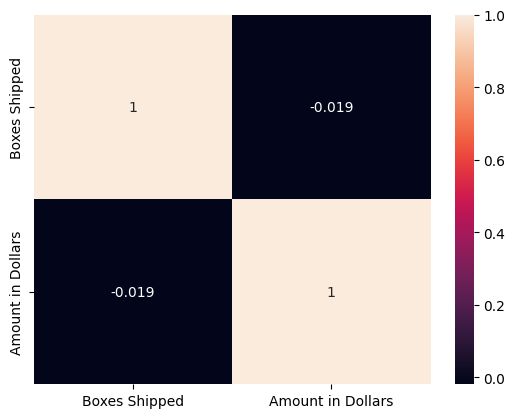

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

### 5. Which country has the highest purchase?


[Text(0, 0, '18.4'),
 Text(0, 0, '17.0'),
 Text(0, 0, '16.9'),
 Text(0, 0, '16.7'),
 Text(0, 0, '15.6'),
 Text(0, 0, '15.4')]

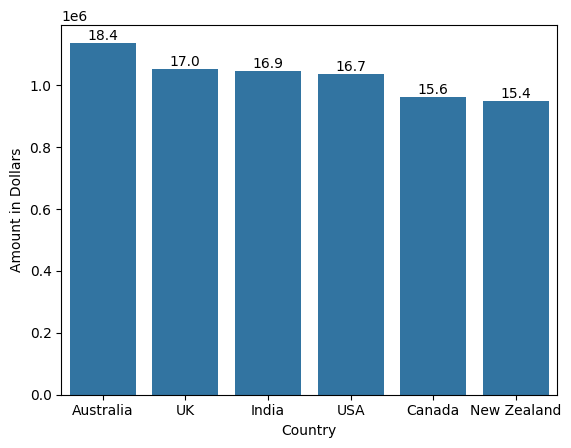

In [ ]:
x= df.groupby(by='Country', as_index=False)['Amount in Dollars'].sum().sort_values(by='Amount in Dollars', ascending=False)
sales_percent = round(x['Amount in Dollars']/x['Amount in Dollars'].sum()*100,1)

a = sns.barplot(x, x='Country', y='Amount in Dollars' )
a.bar_label(a.containers[0], labels=sales_percent)


### 6. Which chocolates had the highest quantity shipped?


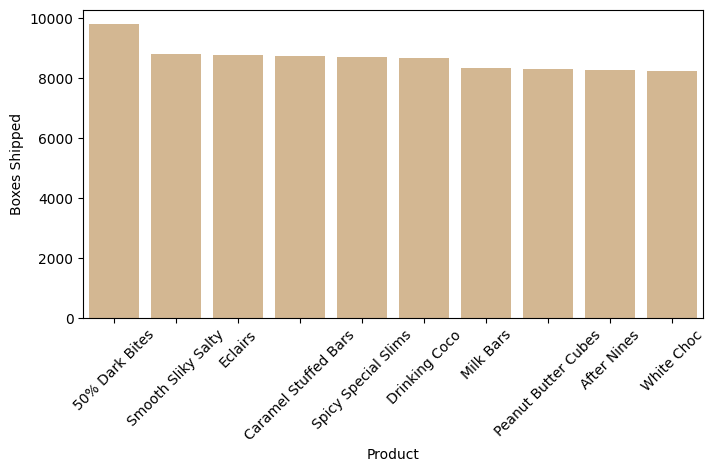

In [ ]:
Choc_percent = round(df['Product'].value_counts()/len(df)*100 ,1)

'''plt.figure(figsize=(18,6))
b= sns.countplot(df, x='Product', order=df['Product'].value_counts()[:10].index, color='burlywood')
b.bar_label(b.containers[0], labels=Choc_percent[:10])'''

d = df.groupby(by='Product', as_index=False)['Boxes Shipped'].sum().sort_values(ascending=False, by='Boxes Shipped')
plt.figure(figsize=(8,4))
plt.xticks(rotation=45)
b= sns.barplot(d.head(10), x='Product', y='Boxes Shipped', color='burlywood')


### 7. Which chocolates generated the highest revenue?


<Axes: xlabel='Product', ylabel='Amount in Dollars'>

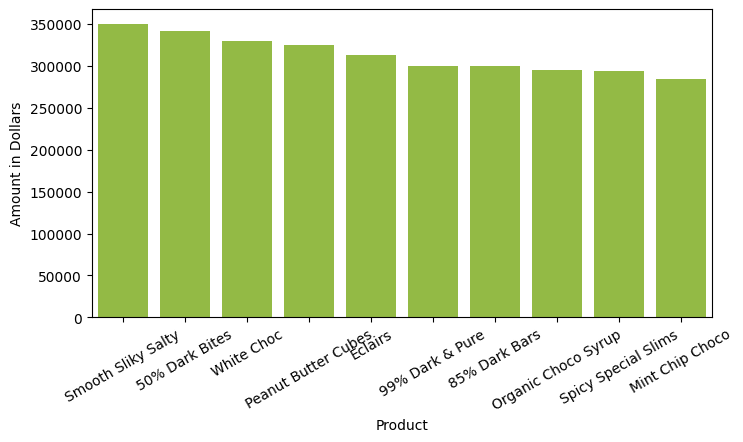

In [ ]:
high_pay_choc = df.groupby(by='Product', as_index=False)['Amount in Dollars'].sum().sort_values(by='Amount in Dollars', ascending=False)
plt.figure(figsize=(8,4))
plt.xticks(rotation=30)
sns.barplot(high_pay_choc.head(10), x='Product', y='Amount in Dollars', color='yellowgreen')

### 8. The most popular product in the highest paying region

In [ ]:
d = df.pivot_table(index='Product', columns='Country', values='Boxes Shipped', aggfunc='sum')
d = d.sort_values(by='Australia', ascending=False)
d.iloc[:5,0]

,Australia
Product,
50% Dark Bites,3182
Almond Choco,2174
70% Dark Bites,2103
Spicy Special Slims,2050
Milk Bars,1821


### 8. What are the sales each month

<Axes: xlabel='Month', ylabel='Amount in Dollars'>

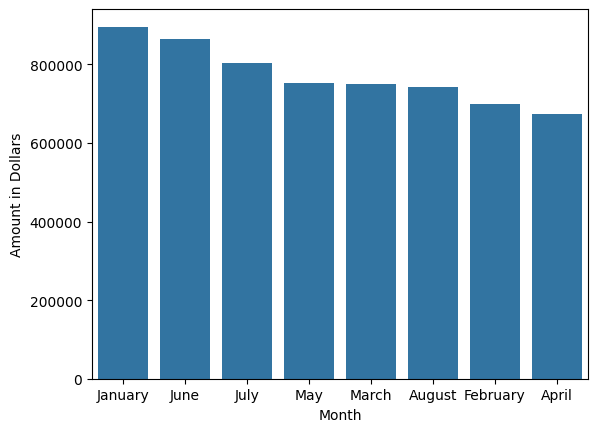

In [ ]:
df1 = df.groupby(by='Month', as_index=False)['Amount in Dollars'].sum().sort_values(by='Amount in Dollars', ascending=False)
sns.barplot(df1, x='Month', y='Amount in Dollars')

### 8. Performance of sales persons

In [ ]:
performance_by_boxes = df.groupby(by='Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False)
performance_by_amount = df.groupby(by='Sales Person')['Amount in Dollars'].sum().sort_values(ascending=False)

print(f'PERFORMANCE BY AMOUNT\n {performance_by_amount.head(5)}\n')
print(f'PERFORMANCE BY BOXES SHIPPED\n {performance_by_boxes.head(5)}')


PERFORMANCE BY AMOUNT
 Sales Person
Ches Bonnell       320901
Oby Sorrel         316645
Madelene Upcott    316099
Brien Boise        312816
Kelci Walkden      311710
Name: Amount in Dollars, dtype: int64

PERFORMANCE BY BOXES SHIPPED
 Sales Person
Karlen McCaffrey       9658
Beverie Moffet         9214
Dennison Crosswaite    8767
Kelci Walkden          8702
Oby Sorrel             8608
Name: Boxes Shipped, dtype: int64


### 9. Performance of sales persons in the highest purchasing country

In [ ]:
pivot_table = df.pivot_table(index='Sales Person', columns='Country', values='Amount in Dollars', aggfunc='sum', fill_value=0)
pivot_table.sort_values(by='Australia', ascending=False).iloc[:5, 0]


,Australia
Sales Person,
Mallorie Waber,71134
Dennison Crosswaite,65275
Brien Boise,60417
Kaine Padly,58415
Madelene Upcott,58359


### 11. Boxes needed for 20% more revenue

In [ ]:
total_revenue = df['Amount in Dollars'].sum()
total_boxes = df['Boxes Shipped'].sum()
price_per_box = total_revenue/total_boxes

boxes_needed = 0.2*total_revenue/price_per_box

print('Total boxes: ', total_boxes)
print('Total Revenue: ', total_revenue)
print('Price of one box: ', price_per_box)
print('Number of boxes needed to increase revenue by 20%: ', boxes_needed)

Total boxes:  177007
Total Revenue:  6183625
Price of one box:  34.93435287869971
Number of boxes needed to increase revenue by 20%:  35401.4


### Insights from the visualizations
1. The distribution of Boxes Shipped and Amount in Dollars are both positively skewed.
2. Boxes Shipped has some outliers. Will remove the most extreme points.
3. Boxes Shipped have no correlation with the revenue generated, which means this column can be dropped before training the model
4. The difference between puchases by different countries is not very much so the class balance is good. Australia had the highest number of purchases, accounting to 18.4 of the total revenue.
5. 50% Dark Bites and Smooh Sliky Salty and Eclairs had the most boxes shipped, in decreasing order
6. Smooh Sliky Salty, 50% Dark Bites and White Choc generated the highest revenue. This does not align with the no. of boxes shipped.
7. Regarding months, January, June and July had the highest purchases, April had the lowest.
8. The no. of boxes shipped also did not align with Highest sales made by each sales person. Ches Bonnell shipped the most boxes, but Karlen McCaffrey made the highest sales.

### Analysis from the insights

**Which salesperson should the chocolate company recognize as the top performer**

Karlen McCaffrey had the highest numbr of chocolates sales, whereas Ches Bonnell made the highest revenue, therefore they both should be the top performers..

**Which country should the company focus on for expanding its chocolate sales? Support your recommendation with data**

The sales in Australia accounts for 18.4% of the total revenue, which is the highest proportion among others. This means Australia has the potential to generate more revnue, therefore the company should expand sales in that region.

In Australia, Mallorie Waber made the highest sales

**What insights can you provide about the popularity of chocolate products? How can the company use this to adjust its production or marketing strategy?**

50% Dark Bites, Smooth Sliky Salty, and Eclairs were bought in the highest quantities overall. 50% Dark Bites also the highest bought chocolate in Australia. Therefore, this product has the potential to make more revune. The company should make efforts to increase its sales through marketing.

**Are there seasonal patterns in chocolate sales**

In months having holidays, sales are the highest. January sees the highest sales, followed by June and July. The company should increase their stock in these months.

**If the company wants to increase revenue by 20%, how many additional boxes of chocolate would need to be shipped, assuming the current average revenue per box remains constant?**

Around thirty five thousand additional boxes need to be shipped for this


# Data preprocessing

### 1. Handling outliers

I will calculate outlier points through interquartile method and will remove those points.

In [ ]:
# function based on IQR method to detect outliers
def outlier_func(data):
  data=np.array(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  print(q1, q3, iqr, lower_bound, upper_bound)
  return (data < lower_bound) |(data > upper_bound)

# detecting outliers in 'Amount in Dollars' column
amount_outliers = outlier_func(df['Amount in Dollars'])

2390.5 8027.25 5636.75 -6064.625 16482.375


In [ ]:
print(amount_outliers.sum())

16


In [ ]:
#16 points are outliers, they will be removed
# removing outliers
df= df[amount_outliers == False ]

### 2. Encoding categorical data

First I dropped the columns `Product` and `Sales person`, because frequency encoding cannot be done (same freq of some values) and I was reluctant to do one hot encoding because of curse of dimensionality.

But, without them, the accuracy was very low (0.5) in all the models, so I had to compromise on number of columns and do one hot encoding of `Product` and `Sales Person` too. This drastically increased the accuracy.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Country', 'Month', 'Sales Person', 'Product'])

In [ ]:
len(df_encoded.columns)

64

The dataset has 64 columns now

### 3. Feature engineering and feature selection

I am binning the `Amount in Dollars` column to make it categorical so that classification algorithms can be applied on it

Amount between 0-5000 is Low Revenue and above 5000 is High Revenue


In [ ]:
bins = [0, 5000, 17000]
labels = ['Low Revenue', 'High Revenue']

df_encoded['Revenue'] = pd.cut(df_encoded['Amount in Dollars'], bins=bins, labels=labels)


In [ ]:
len(df_encoded.columns)

65

In [ ]:
#Dropping some columns which will not be taken as inputs
df_encoded.drop(columns=['Date', 'Boxes Shipped', 'Amount in Dollars'], inplace=True)



In [ ]:
features = df_encoded.drop('Revenue', axis=1)
target = df_encoded['Revenue']

In [ ]:
target.shape

(1078,)

There is no need to standardize/normalize the data since every column is one-hot encoded

### 4. Splitting the data for train/test

In [ ]:
X = features
y= target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (862, 61)
X_test shape: (216, 61)
y_train shape: (862,)
y_test shape: (216,)


In [ ]:
df_encoded.head()

,Country_Australia,Country_Canada,Country_India,Country_New Zealand,Country_UK,Country_USA,Month_April,Month_August,Month_February,Month_January,...,Product_Milk Bars,Product_Mint Chip Choco,Product_Orange Choco,Product_Organic Choco Syrup,Product_Peanut Butter Cubes,Product_Raspberry Choco,Product_Smooth Sliky Salty,Product_Spicy Special Slims,Product_White Choc,Revenue
0,False,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,High Revenue
1,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,High Revenue
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,Low Revenue
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,High Revenue
4,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,High Revenue


# Implementing ML Models

## 1. K-Nearest Neighbour


#### Fitting the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### Predicting on X_test

In [ ]:
y_pred = knn.predict(X_test)

#### Checking accuracy through predict

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy score is: {accuracy_score(y_test, y_pred)}')


Accuracy score is: 0.47685185185185186


#### Comparing test and train accuracy to check overfitting/underfittng

In [ ]:
y_pred_train = knn.predict(X_train)
print(f'Score of test: {knn.score(X_test, y_test)}')
print(f'Score of train: {knn.score(X_train, y_train)}')

Score of test: 0.47685185185185186
Score of train: 0.7517401392111369


The test accuracy is way lower than train accuracy, which indicates that the model is underfitted. I will adjust the value of `k` and also check different distance types and accuracy metrics to overcome this problem

#### Checking null accuracy

In [ ]:
y_test.value_counts()

,count
Revenue,
Low Revenue,123
High Revenue,93


In [ ]:
123/(123+93)

0.5694444444444444

Null accuracy and test set accuracy are almost the same, this further stresses that the model does not perform well. I'll rebuild the model.

#### Rebuilding the model with k=5

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
print(f'Accuracy is: {accuracy_score(y_test, y_pred)}')

Accuracy is: 0.7037037037037037


#### Comparing test/train to check over/underfitting

In [ ]:
y_pred_train = knn.predict(X_train)
print(f'Score of test: {knn.score(X_test, y_test)}')
print(f'Score of train: {knn.score(X_train, y_train)}')

Score of test: 0.7037037037037037
Score of train: 0.45591647331786544


The model is underfitted. To address this, I endoded the `Product` column too and added it in the features, but it didn't help. So I did hyperparameter tuning with the help of GridSearchCV

#### Hyperparameter tuning of KNN with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {

    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],
    'n_neighbors': [5,7,9]
}
# Performing GridSearchCV
knn_gridsearch = GridSearchCV(knn, cv=5, param_grid=param)
knn_gridsearch.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", knn_gridsearch.best_params_)
print("Best Estimator:", knn_gridsearch.best_estimator_)
print("Best Accuracy:", knn_gridsearch.best_score_)

# Evaluating on test data
best_knn = knn_gridsearch.best_estimator_
best_knn_score = best_knn.score(X_test, y_test)
print("Test Accuracy:", best_knn_score)

#Evaluating on train data and comparing results with test accuracy to check over/unferfitting
train_score = best_knn.score(X_train, y_train)
print(f'Train score: {train_score}')
test_score = best_knn.score(X_test, y_test)
print(f'Test score: {test_score}')


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(metric='manhattan')
Best Accuracy: 0.5441188331765022
Test Accuracy: 0.49074074074074076
Train score: 0.679814385150812
Test score: 0.49074074074074076


* Tuning the model resulted in overfitting, because the training accuracy was noticabely higher than the test accuracy.
* Therefore, knn is not a good model for this dataset

In [ ]:
from sklearn.metrics import classification_report
evaluation_report = pd.DataFrame()

knn_report = classification_report(y_test, best_knn.predict(X_test))

## 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

logr.fit(X_train, y_train)

LogisticRegression()

#### Comparing test/train accuracy

In [ ]:
#Exact same thing
#print(accuracy_score(logr.predict(X_train), y_train))
#print(accuracy_score(logr.predict(X_test), y_test))

print(f'Accuracy of train set: {logr.score(X_train, y_train)}')
print(f'Accuracy of test set: {logr.score(X_test, y_test)}')

Accuracy of train set: 0.605568445475638
Accuracy of test set: 0.48148148148148145


Train set has noticabely higher accuracy so there's a problem of overfitting. The accuracies are also very low so the model does not perform well.

I changed the `class_weight` to `balanced`, but it only reduced the test set accuracy from 0.48 to 0.46

## 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.4861111111111111


There's high overfitting so I'll tune the Decision Tree model

## 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
print(f'Accuracy of train set: {rf.score(X_train, y_train)}')
print(f'Accuracy of test set: {rf.score(X_test, y_test)}')

Accuracy of train set: 1.0
Accuracy of test set: 0.4398148148148148


The train accuracy is 1.0 and test accuracy 0.4, meaning there's high overfitting. I will tune the RF model to make it less complex, because the dataset is relatively small and there's high dimentionality, so the trees are memorizing the samples

#### Hyperparameter tuning of Random Forest through GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {

    'n_estimators': [70, 100, 200, 400],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
}

# Performing GridSearchCV
rf_gridsearch = GridSearchCV(RandomForestClassifier(), cv=5, param_grid=param)
rf_gridsearch.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", rf_gridsearch.best_params_)
print("Best Estimator:", rf_gridsearch.best_estimator_)
print("Best Score (R2):", rf_gridsearch.best_score_)

# Evaluating on test data
best_rf = rf_gridsearch.best_estimator_
best_rf_score = best_rf.score(X_test, y_test)
print("Test Score (R2):", best_rf_score)

#Evaluating on train data and comparing results with test accuracy to check over/unferfitting
train_score = best_rf.score(X_train, y_train)
print(f'Train score: {train_score}')
test_score = best_rf.score(X_test, y_test)
print(f'Test score: {test_score}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)
Best Score (R2): 0.5196733431912891
Test Score (R2): 0.4675925925925926
Train score: 0.7726218097447796
Test score: 0.4675925925925926


Tuning the model greatly reduced overfitting. However, to further reduce it, I'll check feature importances and discard the least important features

#### Feature importance

<Axes: title={'center': 'Top 20 Feature Importances'}>

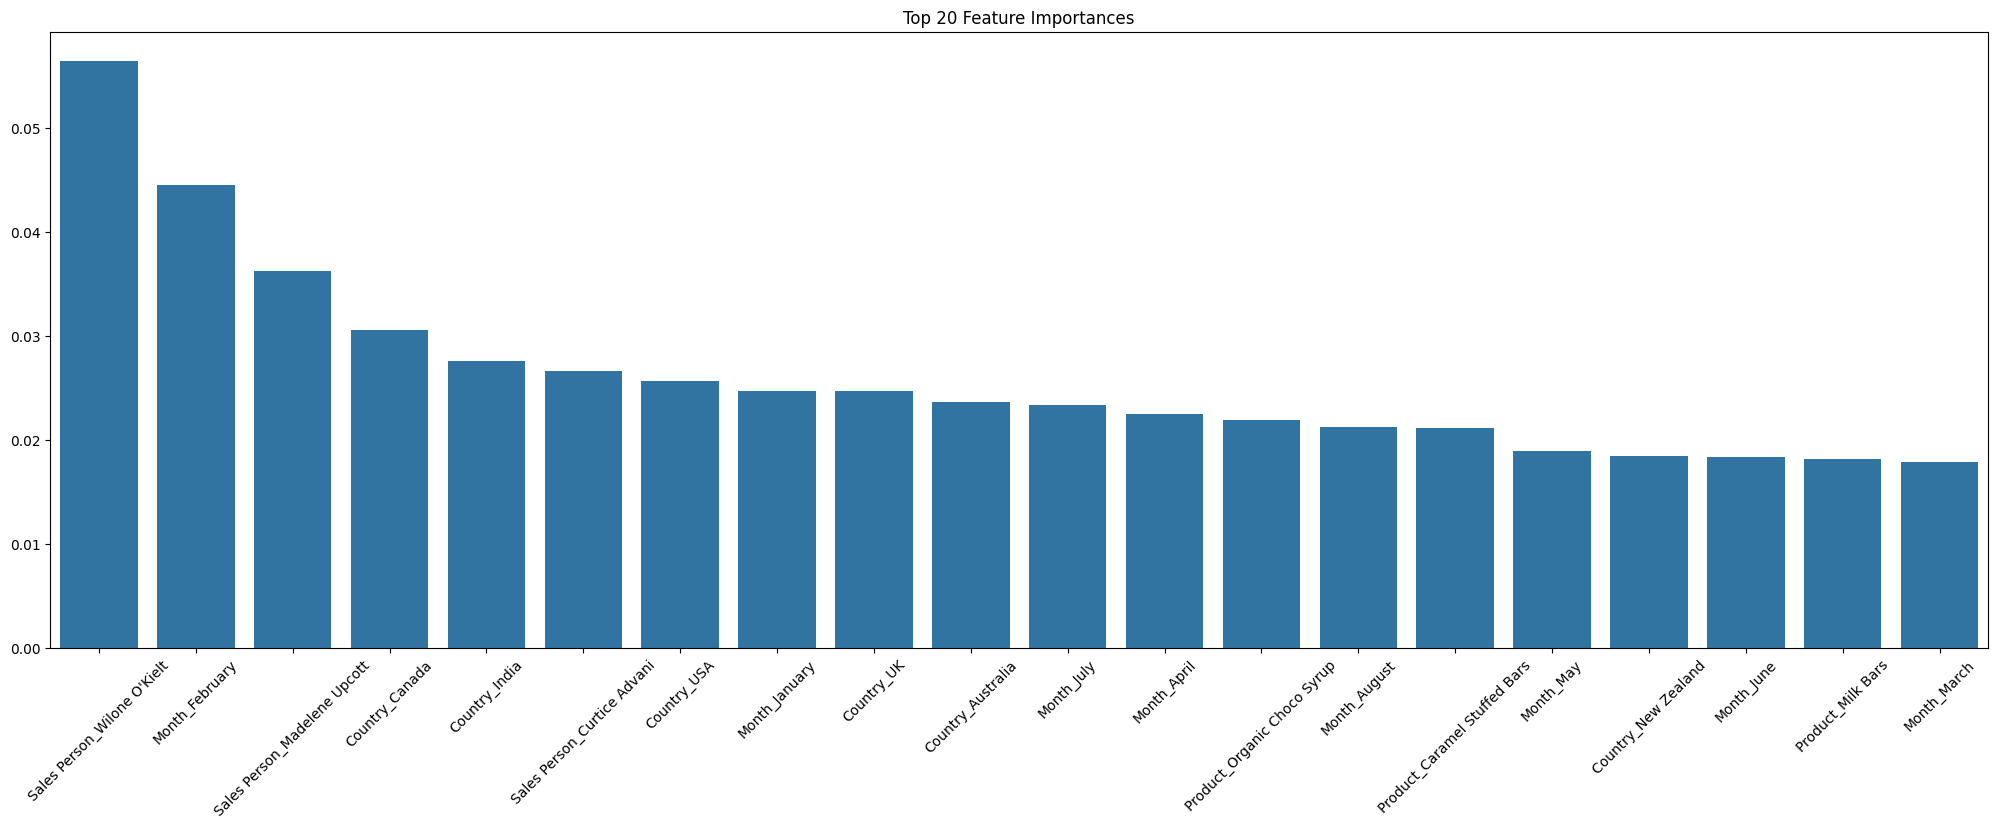

In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(25,8))
plt.title("Top 20 Feature Importances")
plt.xticks(rotation=45)
sns.barplot(feat_imp[:20])


#### Training the model on top 20 features

In [ ]:
#Selecting top 20 features
top_features = feat_imp.sort_values(ascending=False).head(20).index.tolist()

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

#Training Random Forest with the top 20 features
best_params = rf_gridsearch.best_params_
rf_reduced = RandomForestClassifier(**best_params, random_state=42)
rf_reduced.fit(X_train_top, y_train)

#Evaluating
train_score = rf_reduced.score(X_train_top, y_train)
test_score = rf_reduced.score(X_test_top, y_test)
print(f"Train accuracy (reduced): {train_score}")
print(f"Test accuracy (reduced): {test_score}")


Train accuracy (reduced): 0.6589327146171694
Test accuracy (reduced): 0.5


I started with top 20 features. When I trained the model with the top 20 feautures only, the test accuracy increased from 0.46 to 0.5, and the train and test accuracy also became comparable, which means overfitting was further reduced

However, when I increased the number of top features to 30 and 40, the train accuracy was increasing but the test accuracy was stuck at 0.5, so I sticked to top 20 features

# Evaluating the models

In [ ]:
from sklearn.metrics import classification_report
evaluation_report = pd.DataFrame()

knn_report = classification_report(y_test, best_knn.predict(X_test))
logr_report = classification_report(y_test, logr.predict(X_test))
rf_report = classification_report(y_test, rf_reduced.predict(X_test_top))

print('KNN REPORT\n', knn_report)
print('LOGISTIC REGRESSION REPORT\n', logr_report)
print('RANDOM FOREST REPORT\n', rf_report)

KNN REPORT
               precision    recall  f1-score   support

High Revenue       0.42      0.47      0.44        93
 Low Revenue       0.56      0.50      0.53       123

    accuracy                           0.49       216
   macro avg       0.49      0.49      0.49       216
weighted avg       0.50      0.49      0.49       216

LOGISTIC REGRESSION REPORT
               precision    recall  f1-score   support

High Revenue       0.41      0.46      0.43        93
 Low Revenue       0.55      0.50      0.52       123

    accuracy                           0.48       216
   macro avg       0.48      0.48      0.48       216
weighted avg       0.49      0.48      0.48       216

RANDOM FOREST REPORT
               precision    recall  f1-score   support

High Revenue       0.41      0.38      0.39        93
 Low Revenue       0.56      0.59      0.57       123

    accuracy                           0.50       216
   macro avg       0.48      0.48      0.48       216
weighted avg